In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr
import os
import matplotlib.ticker as ticker
dpi = 150
fs = 15

workdir = '/Users/diana/Dropbox/UW/Research/rasm/rasm_project_meeting_oct2016/'

In [2]:
coupler_fields = ['x2lavg_Sa_z', 'x2lavg_Sa_u', 'x2lavg_Sa_v', 'x2lavg_Sa_tbot', 'x2lavg_Sa_ptem', 
                 'x2lavg_Sa_shum', 'x2lavg_Sa_pbot', 'x2lavg_Faxa_rainc', 'x2lavg_Faxa_rainl', 
                 'x2lavg_Faxa_snowc', 'x2lavg_Faxa_snowl', 'x2lavg_Faxa_lwdn', 'x2lavg_Faxa_swndr', 
                 'x2lavg_Faxa_swvdr', 'x2lavg_Faxa_swndf', 'x2lavg_Faxa_swvdf', 'x2lavg_Flrr_flood', 
                 'l2xavg_Flrl_rofice', 'l2xavg_Flrl_rofliq', 'l2xavg_Fall_evap', 'l2xavg_Fall_lwup', 
                 'l2xavg_Fall_sen', 'l2xavg_Fall_lat', 'l2xavg_Fall_tauy', 'l2xavg_Fall_taux', 
                 'l2xavg_Fall_swnet', 'l2xavg_Sl_u10', 'l2xavg_Sl_snowh', 'l2xavg_Sl_ram1', 'l2xavg_Sl_fv', 
                 'l2xavg_Sl_t', 'l2xavg_Sl_logz0', 'l2xavg_Sl_qref', 'l2xavg_Sl_tref', 'l2xavg_Sl_anidf', 
                 'l2xavg_Sl_avsdf', 'l2xavg_Sl_anidr', 'l2xavg_Sl_avsdr']

In [4]:
# load data
# cpl_vic4 = xr.open_dataset(os.path.join(workdir, 'rasm_data_atm', 'vic4.RI.test.20161117a.cpl.ha.1949-09.nc'))
cpl_vic4 = xr.open_dataset(os.path.join(workdir, 'rasm_data_atm', 'vic4.RI.test.20170212a.cpl.ha.1948-09.nc'))

# cpl_vic5 = xr.open_dataset(os.path.join(workdir, 'rasm_data_atm', 'vic5.RI.test.20161016a.cpl.ha.1948-09.nc'))
cpl_vic5 = xr.open_dataset(os.path.join(workdir, 'rasm_data_atm', 'vic5.RI.test.20170225a.cpl.ha.1948-09.nc'))

'''months = ['09', '10', '11', '12', '01', '02', '03', '04', '05', '06', '07', '08']
years = ['1948', '1948', '1948', '1948', '1949', '1949', '1949', '1949', '1949', '1949', '1949', '1949']'''
months = ['09']
years = ['1948']

//anaconda/envs/vic_test_env/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
//anaconda/envs/vic_test_env/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
//anaconda/envs/vic_test_env/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained

saved figure for 09 1948


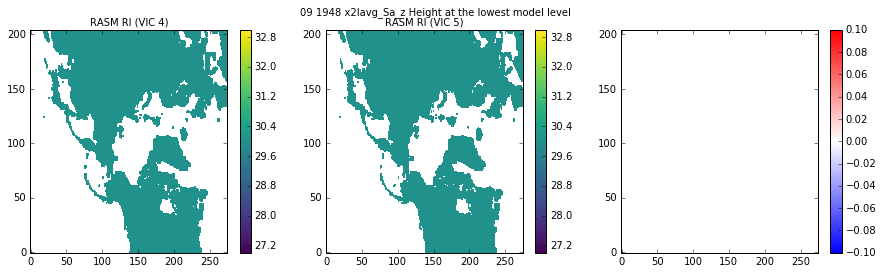

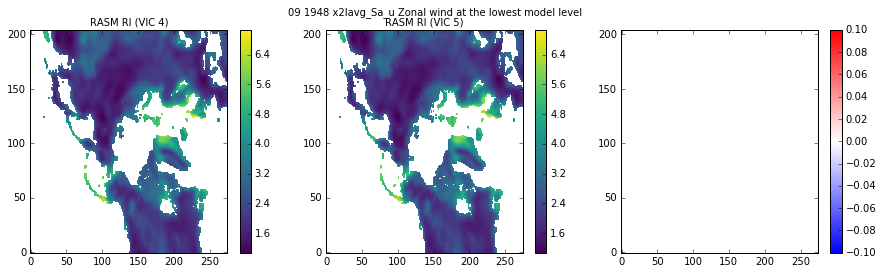

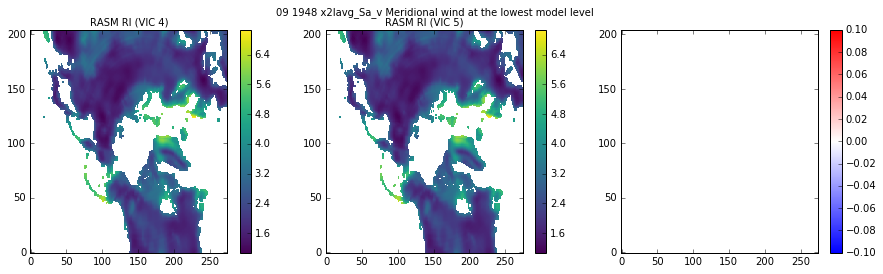

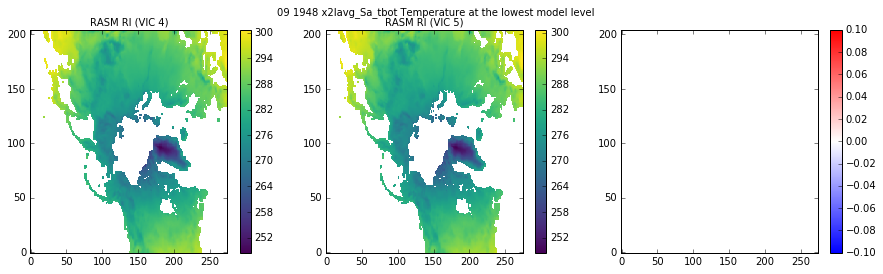

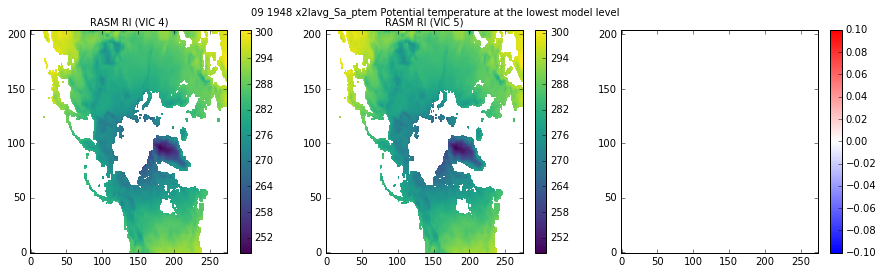

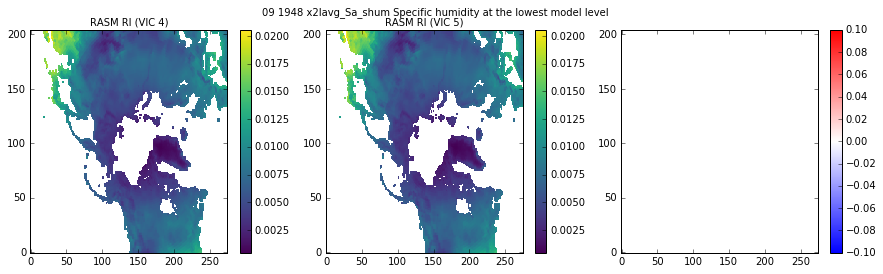

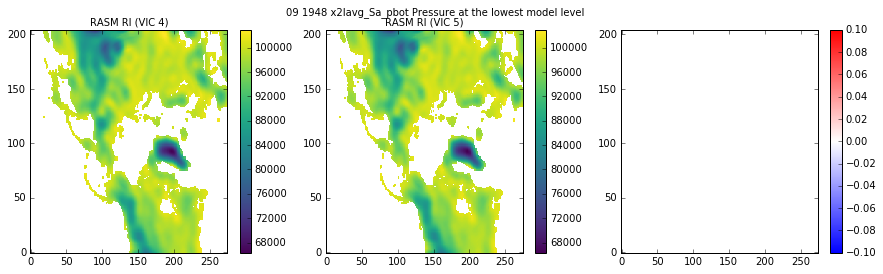

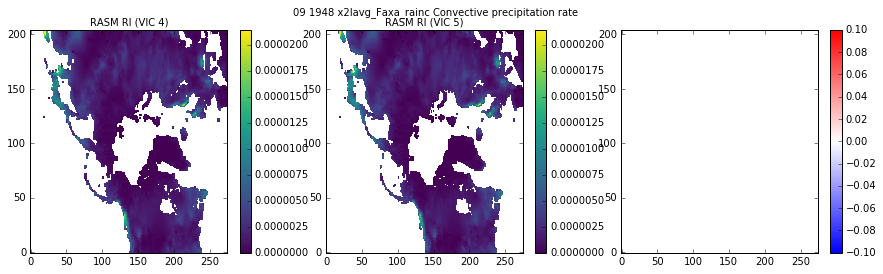

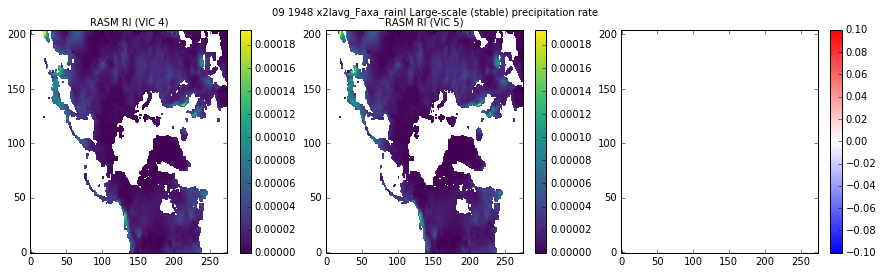

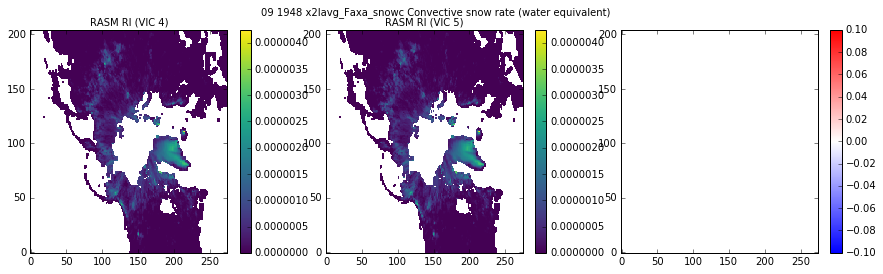

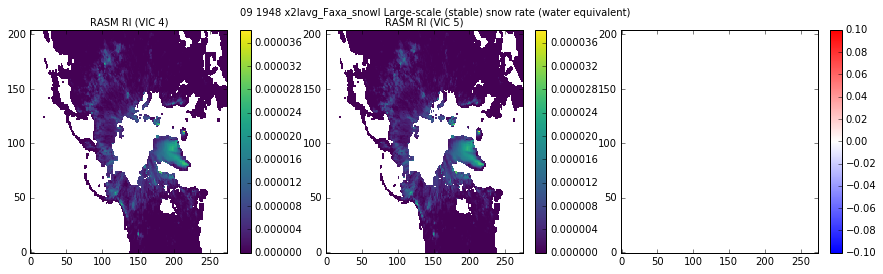

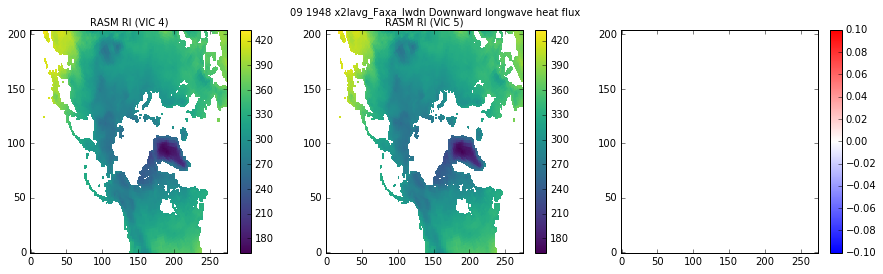

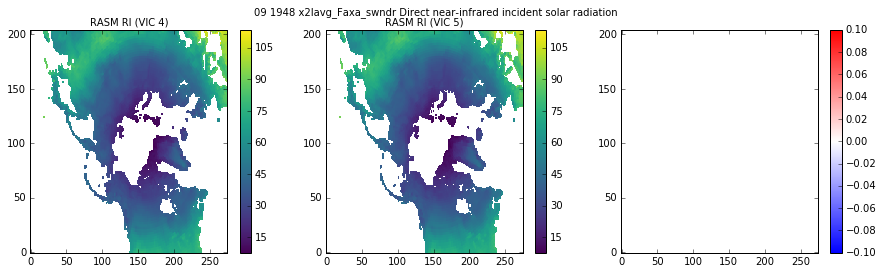

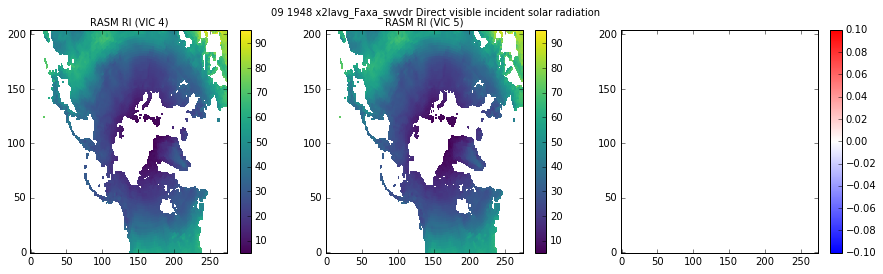

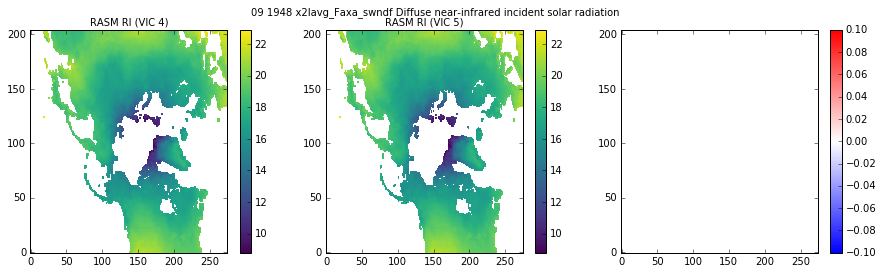

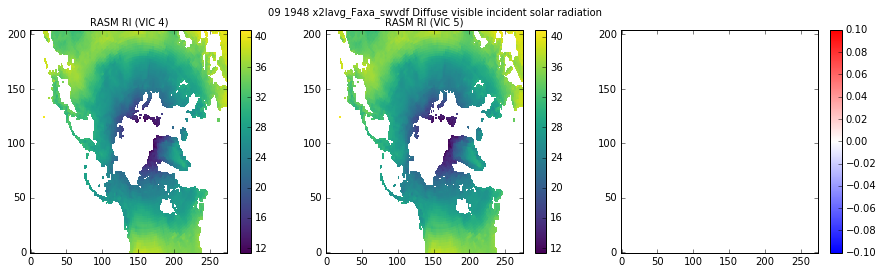

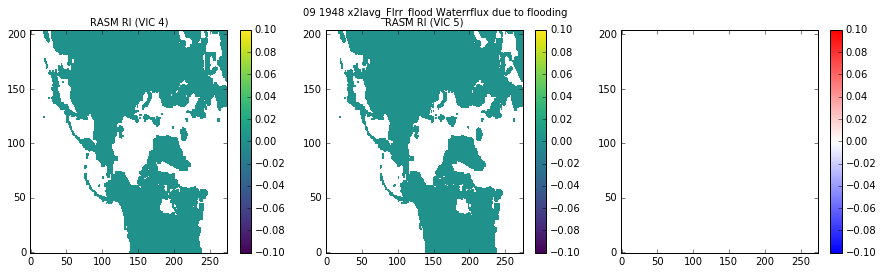

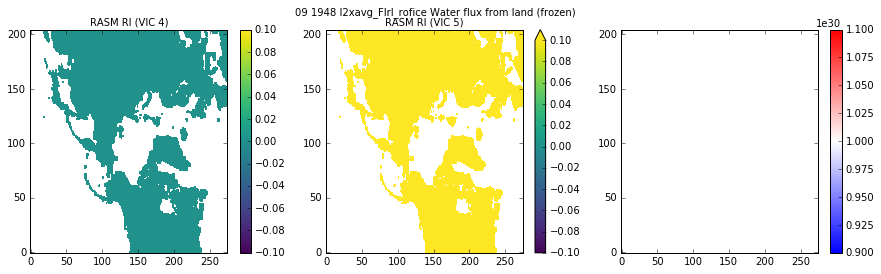

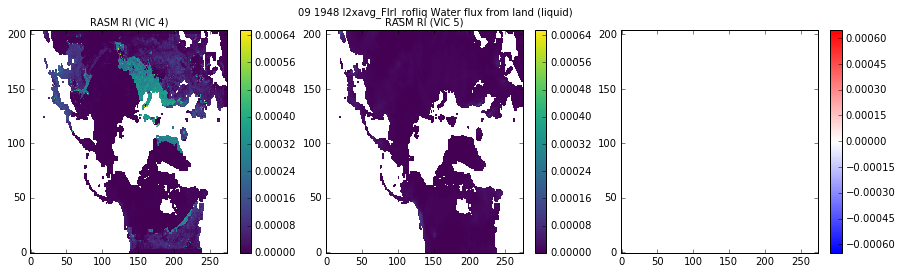

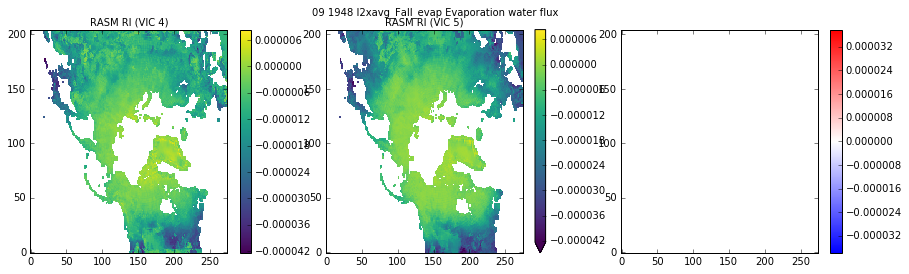

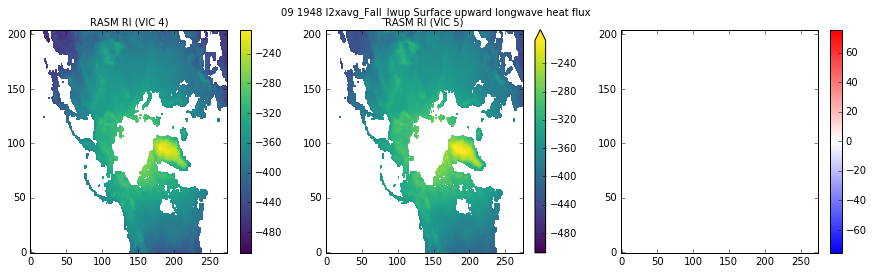

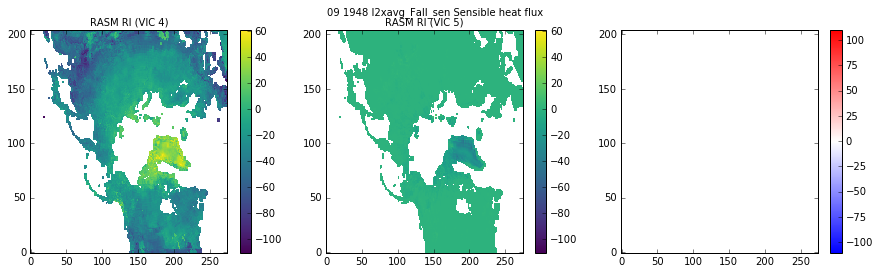

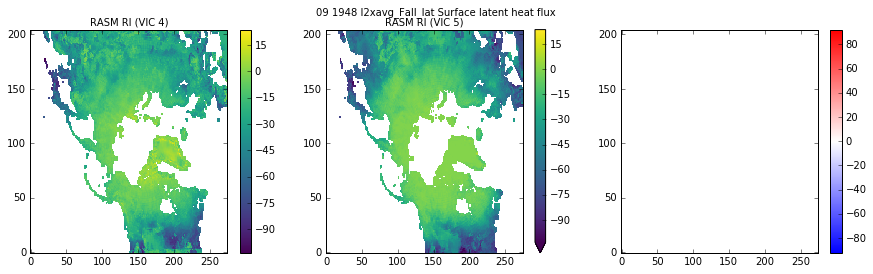

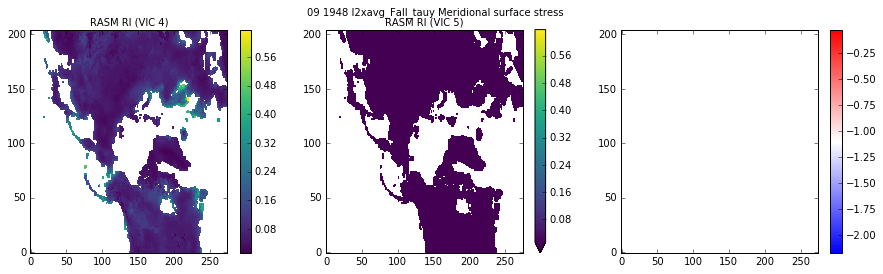

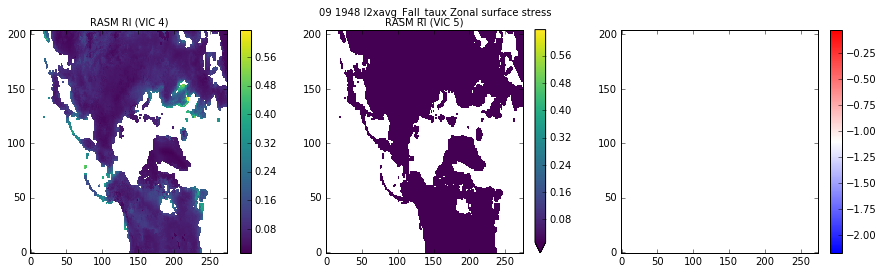

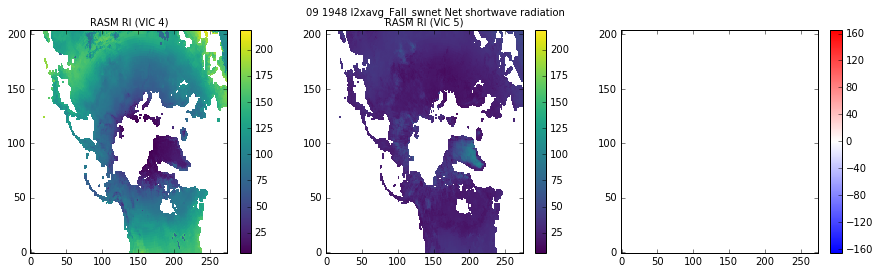

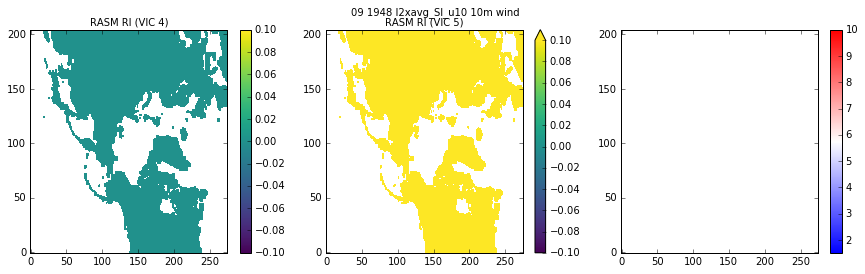

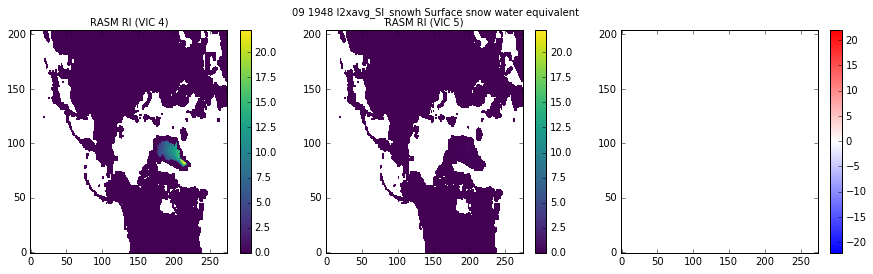

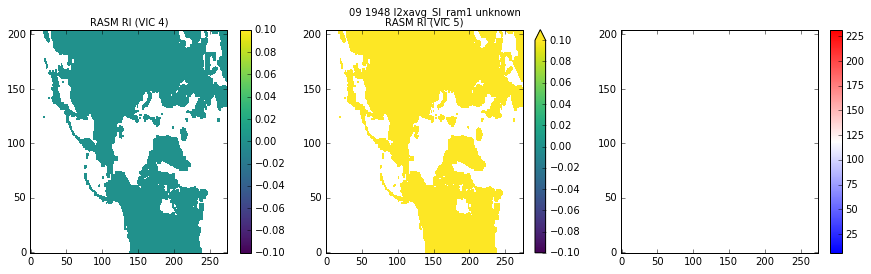

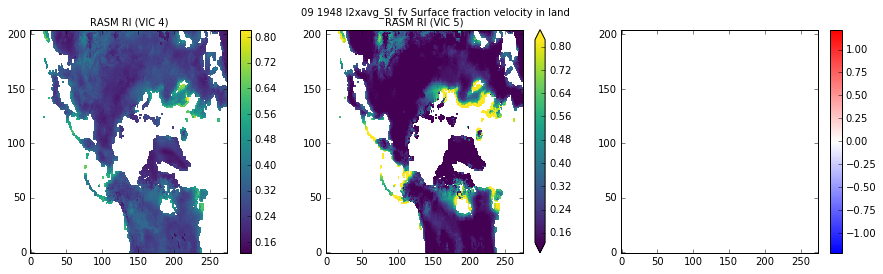

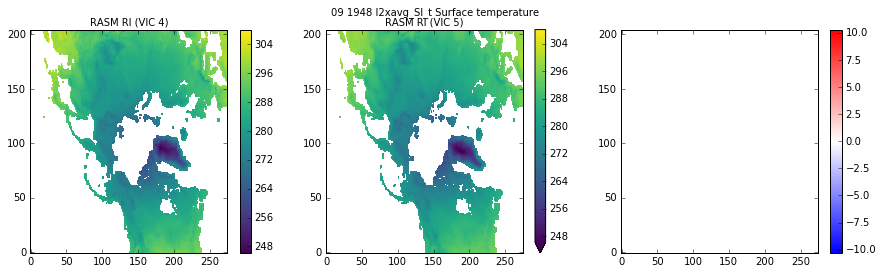

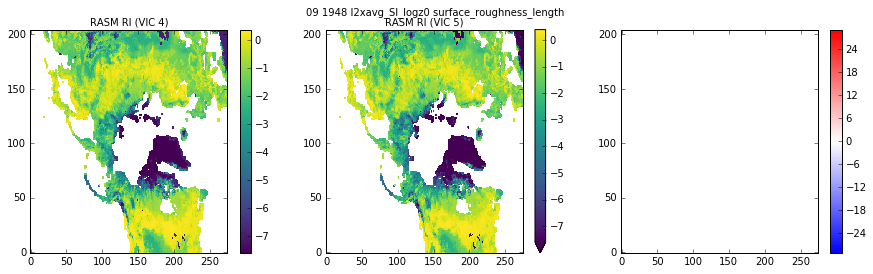

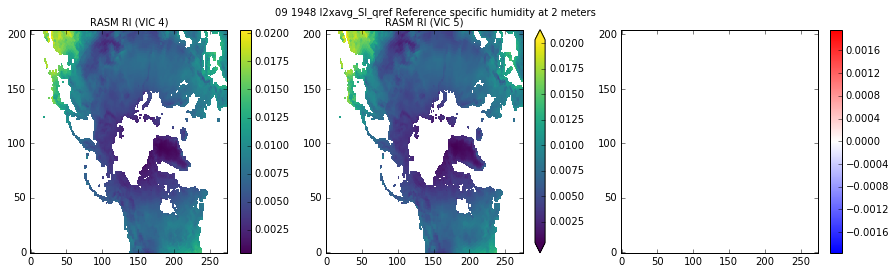

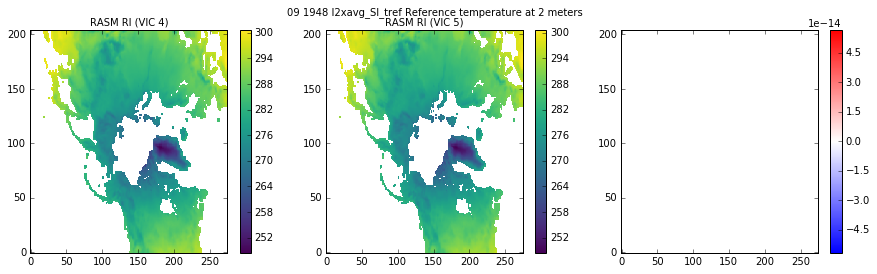

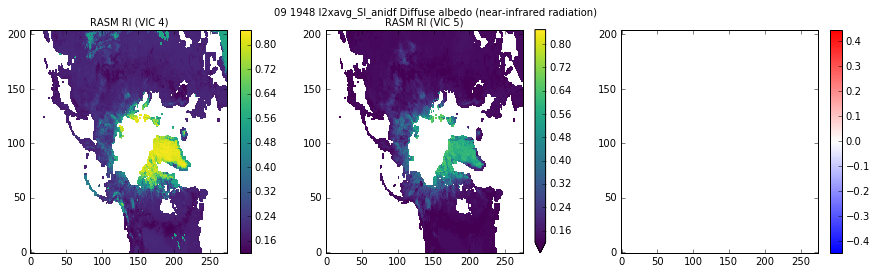

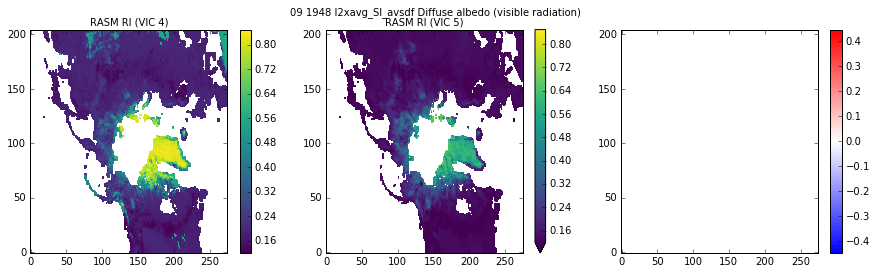

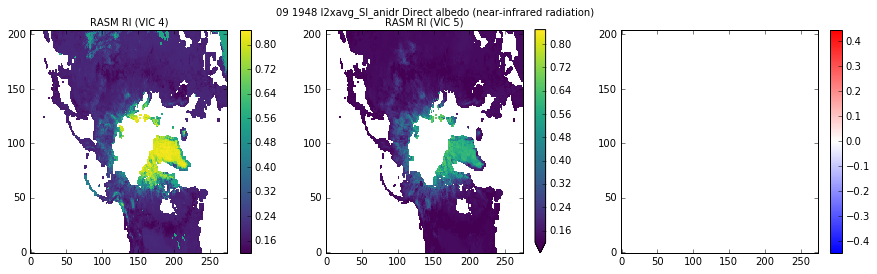

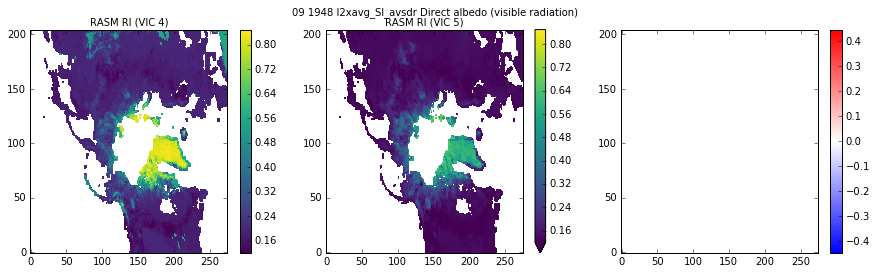

In [21]:
# loop over variables
fs = 10
for j, month in enumerate(months):
    
    # load data
    vic4_filename = 'vic4.RI.test.20170212a.cpl.ha.%s-%s.nc' %(years[j], month)
    cpl_vic4 = xr.open_dataset(os.path.join(workdir, 'rasm_data_atm', vic4_filename))
    vic5_filename = 'vic5.RI.test.20170225a.cpl.ha.%s-%s.nc' %(years[j], month)
    cpl_vic5 = xr.open_dataset(os.path.join(workdir, 'rasm_data_atm', vic5_filename))
    
    for variable in coupler_fields: 
        fig, axs = plt.subplots(1,3, figsize=(15, 4))
        for i, axes in enumerate(axs.ravel()): 
            if i == 0: 
                vmin = cpl_vic4[variable].min()
                vmax = cpl_vic4[variable].max()
                cpl_vic4[variable].plot(cmap='viridis', ax=axes, add_labels=False, vmin=vmin, vmax=vmax)
                axes.set_title('RASM RI (VIC 4)', size=fs)
            elif i == 1: 
                cpl_vic5[variable].plot(cmap='viridis', ax=axes, add_labels=False, vmin=vmin, vmax=vmax)
                axes.set_title('RASM RI (VIC 5)', size=fs)
            elif i == 2: 
                (cpl_vic5[variable] - cpl_vic4[variable]).plot(cmap='bwr', ax=axes, add_labels=False)
                axes.set_title('RASM RI (VIC 5) - RASM RI (VIC 4)', size=fs)
            else: 
                print("%f should not be iterating to this value" % i)
        
        direc = os.path.join(workdir, 'rasm_data_atm', 'plots', 'coupler_field_plots_nocanopy', variable)
        os.makedirs(direc, exist_ok=True)
        fig.suptitle('%s %s %s %s' % (month, years[j], variable, cpl_vic4[variable].long_name), size=fs)
        plotname = '%s-%s.png' %(month, years[j])
        savepath = os.path.join(direc, plotname)
        plt.savefig(savepath, format='png', dpi=dpi, bbox_inches='tight')
        plt.cla()
    print("saved figure for %s %s" % (month, years[j]))

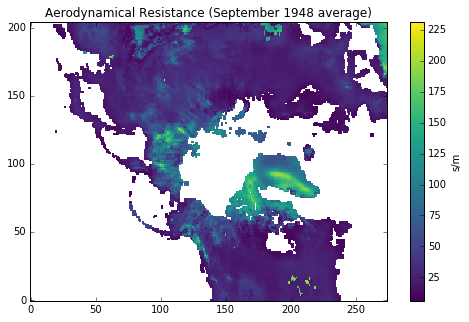

In [20]:
dpi = 200
fig = plt.figure(figsize=(8,5))
variable = 'l2xavg_Sl_ram1'
img = cpl_vic5[variable].plot(cmap='viridis', add_labels=False, add_colorbar=False)
cbar = plt.colorbar(img)
cbar.set_label('s/m')   
plt.title("Aerodynamical Resistance (September 1948 average)")

direc = os.path.join(workdir, 'rasm_data_atm', 'plots', 'coupler_field_plots_nocanopy')
os.makedirs(direc, exist_ok=True)
plotname = 'aerodynamical_resistance_%s-%s.png' %(month, years[j])
savepath = os.path.join(direc, plotname)
plt.savefig(savepath, format='png', dpi=dpi, bbox_inches='tight')